In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from scipy.optimize import newton

file_path = 'data.xlsx'
data = pd.read_excel(file_path, sheet_name='in')

production_data = data.iloc[0].values

timeline = pd.date_range(start='2018-01', periods=len(production_data), freq='ME')


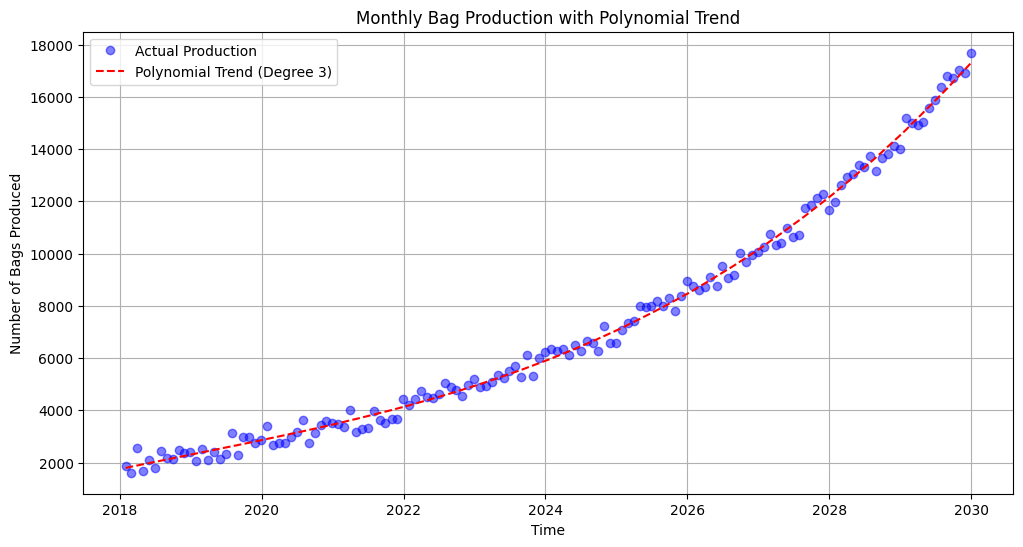

Polynomial Coefficients: ['1795.600', '46.966', '-0.123', '0.004']


In [2]:

# Problem 1: Polynomial Regression Model
months_since_start = np.arange(len(production_data))

degree = 3
p = Polynomial.fit(months_since_start, production_data, degree)

production_trend = p(months_since_start)

plt.figure(figsize=(12, 6))
plt.plot(timeline, production_data, marker='o', linestyle='', color='blue', alpha=0.5, label='Actual Production')
plt.plot(timeline, production_trend, linestyle='--', color='r', label=f'Polynomial Trend (Degree {degree})')
plt.title('Monthly Bag Production with Polynomial Trend')
plt.xlabel('Time')
plt.ylabel('Number of Bags Produced')
plt.legend()
plt.grid(True)
plt.show()

print("Polynomial Coefficients:", [f"{coef:.3f}" for coef in p.convert().coef])

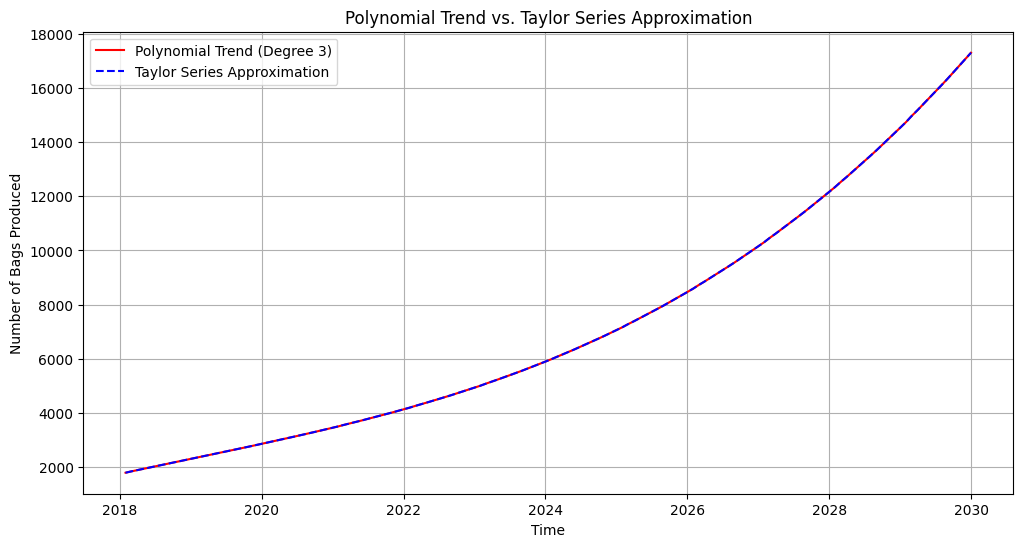

In [23]:

# Problem 2: Polynomial Function (Taylor Series Approximation)
def taylor_series_approximation(x, p, a, n):
    approximation = p(a)
    for i in range(1, n+1):
        term = (p.deriv(i)(a) * (x - a)**i) / math.factorial(i)
        approximation += term
    return approximation

a = months_since_start[len(months_since_start) // 2]
n = 3

production_taylor = taylor_series_approximation(months_since_start, p, a, n)

plt.figure(figsize=(12, 6))
plt.plot(timeline, production_trend, linestyle='-', color='r', label=f'Polynomial Trend (Degree {degree})')
plt.plot(timeline, production_taylor, linestyle='--', color='b', label='Taylor Series Approximation')
plt.title('Polynomial Trend vs. Taylor Series Approximation')
plt.xlabel('Time')
plt.ylabel('Number of Bags Produced')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Problem 3: Warehouse Capacity Prediction using Newton-Raphson Method
def production_model(x):
    return taylor_series_approximation(x, p, a, n)

def root_function(x):
    return production_model(x) - 25000

initial_guess = months_since_start[-1]
exceed_month = newton(root_function, initial_guess)
build_start_month = exceed_month - 13

exceed_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(exceed_month))
build_start_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(build_start_month))

print(f"Production exceeds 25,000 bags in: {exceed_date.strftime('%B %Y')}")
print(f"Start building the new warehouse by: {build_start_date.strftime('%B %Y')}")

print(f"Root Result (Month when production exceeds 25,000 bags): {exceed_month:.3f}")
print(f"Month to start building the warehouse: {build_start_month:.3f}")

Production exceeds 25,000 bags in: February 2032
Start building the new warehouse by: January 2031
Root Result (Month when production exceeds 25,000 bags): 169.374
Month to start building the warehouse: 156.374
